In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('House Data.csv')

In [3]:
data

,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,0x21e3,Apartment,106,NaN,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98
1,0x68d4,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20
2,0x7d81,Apartment,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39
3,0x7a57,Apartment,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,31.46
4,0x9409,Bungalow,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,93.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39494,0x6e26,Single-family home,1120,3.0,2,NaN,0.0,No,All time,5.55,Slightly above average,Medium,80.0,3.56,73.43
39495,0xa013,Apartment,445,1.0,3,Fully Furnished,1.0,No,All time,5.70,Slightly above average,Medium,86.0,2.93,79.91
39496,0x9721,Bungalow,3780,6.0,6,Unfurnished,0.0,Yes,Once in two days,6.84,Well below average,Medium,137.0,3.80,81.44
39497,0x7e25,Single-family home,1266,3.0,1,Semi_Furnished,0.0,No,Once in a day - Morning,4.60,Slightly above average,NaN,88.0,3.25,71.33


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39499 entries, 0 to 39498
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property_ID             39499 non-null  object 
 1   Property_Type           39499 non-null  object 
 2   Property_Area           39499 non-null  int64  
 3   Number_of_Windows       37845 non-null  float64
 4   Number_of_Doors         39499 non-null  int64  
 5   Furnishing              38457 non-null  object 
 6   Frequency_of_Powercuts  38116 non-null  float64
 7   Power_Backup            39499 non-null  object 
 8   Water_Supply            39499 non-null  object 
 9   Traffic_Density_Score   39499 non-null  float64
 10  Crime_Rate              38712 non-null  object 
 11  Dust_and_Noise          38280 non-null  object 
 12  Air_Quality_Index       39499 non-null  float64
 13  Neighborhood_Review     39499 non-null  float64
 14  Habitability_score      39499 non-null

In [16]:
data.isnull().sum()

Property_Type             0
Property_Area             0
Number_of_Windows         0
Number_of_Doors           0
Furnishing                0
Frequency_of_Powercuts    0
Power_Backup              0
Water_Supply              0
Traffic_Density_Score     0
Crime_Rate                0
Dust_and_Noise            0
Air_Quality_Index         0
Neighborhood_Review       0
Habitability_score        0
dtype: int64

In [15]:
data.fillna(0, inplace = True)

In [7]:
data.drop(['Property_ID'], axis = 1, inplace = True)

In [90]:
data.shape

(39499, 15)

In [116]:
data.describe()

,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
count,39499.000000,39499.000000,39499.000000,39499.000000,39499.000000,39499.000000,39499.000000,39499.000000,39499.000000,39499.000000,39499.000000,39499.000000,39499.000000,39499.000000
mean,2.843034,1391.715638,3.759462,2.331375,2.012760,0.467708,1.205803,1.351680,6.354772,3.179599,1.909415,121.352566,3.735945,73.482297
std,1.728091,1953.287544,2.748803,1.179964,0.750741,0.744272,0.453187,1.417895,1.219681,1.006485,0.499021,62.384669,0.796843,14.118753
min,0.000000,100.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.280000
25%,1.000000,494.000000,2.000000,1.000000,2.000000,0.000000,1.000000,0.000000,5.600000,3.000000,2.000000,95.000000,3.220000,69.660000
50%,3.000000,932.000000,3.000000,2.000000,2.000000,0.000000,1.000000,1.000000,6.470000,3.000000,2.000000,113.000000,3.850000,75.760000
75%,5.000000,1770.000000,5.000000,3.000000,3.000000,1.000000,1.000000,3.000000,7.220000,4.000000,2.000000,140.000000,4.260000,82.260000
max,5.000000,28064.000000,15.000000,6.000000,3.000000,3.000000,2.000000,4.000000,9.910000,4.000000,3.000000,1044.000000,5.000000,100.000000


In [20]:
data['Water_Supply'].unique()

array(['Once in a day - Morning', 'Once in a day - Evening', 'All time',
       'NOT MENTIONED', 'Once in two days'], dtype=object)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

In [11]:
data['Property_Type'] = le.fit_transform(data['Property_Type'])
data['Power_Backup'] = le.fit_transform(data['Power_Backup'])
data['Water_Supply'] = le.fit_transform(data['Water_Supply'])

In [70]:
data['Dust_and_Noise'].unique()

array(['Medium', 0, 'High', 'Low'], dtype=object)

In [12]:
def label_furnishing(data):
    if isinstance(data['Furnishing'], str) and 'Fully Furnished' in data['Furnishing']:
        return 1
    if isinstance(data['Furnishing'], str) and 'Semi_Furnished' in data['Furnishing']:
        return 2
    if isinstance(data['Furnishing'], str) and 'Unfurnished' in data['Furnishing']:
        return 3
    
data['Furnishing'] = data.apply(label_furnishing, axis=1)    

In [13]:
def label_Crime_Rate(data):
    if isinstance(data['Crime_Rate'], str) and 'Slightly above average' in data['Crime_Rate']:
        return 2
    if isinstance(data['Crime_Rate'], str) and 'Well above average' in data['Crime_Rate']:
        return 1
    if isinstance(data['Crime_Rate'], str) and 'Slightly below average' in data['Crime_Rate']:
        return 3
    if isinstance(data['Crime_Rate'], str) and 'Well below average' in data['Crime_Rate']:
        return 4
data['Crime_Rate'] = data.apply(label_Crime_Rate, axis = 1)    

In [14]:
def label_Dust_and_Noise(data):
    if isinstance(data['Dust_and_Noise'], str) and 'High' in data['Dust_and_Noise']:
        return 1
    if isinstance(data['Dust_and_Noise'], str) and 'Medium' in data['Dust_and_Noise']:
        return 2
    if isinstance(data['Dust_and_Noise'], str) and 'Low' in data['Dust_and_Noise']:
        return 3
    
data['Dust_and_Noise'] = data.apply(label_Dust_and_Noise, axis =1)    

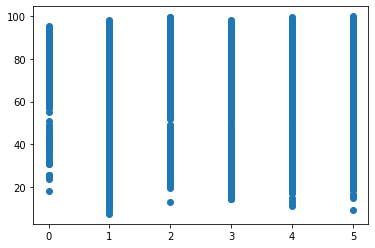

In [30]:
plt.scatter(x = data['Property_Type'], y = data['Habitability_score'])

<AxesSubplot:xlabel='Property_Type', ylabel='Habitability_score'>

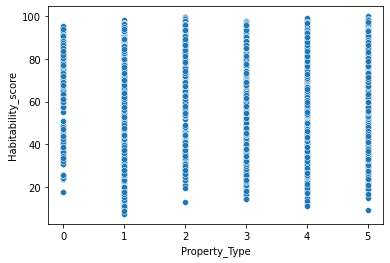

In [31]:
sns.scatterplot(x = data['Property_Type'], y = data['Habitability_score'])

<AxesSubplot:>

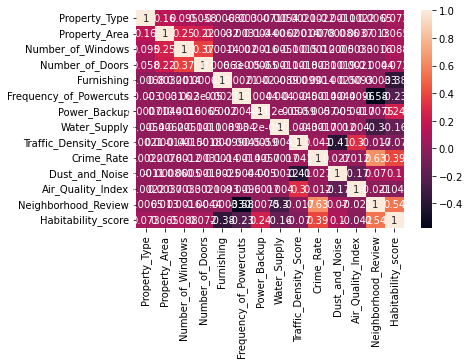

In [120]:
sns.heatmap(data= data.corr(), annot = True)

In [17]:
x = data.iloc[:, 0:-1].values
y = data.iloc[:,-1].values

In [18]:
X = data[['Property_Area','Furnishing','Frequency_of_Powercuts','Power_Backup','Water_Supply','Crime_Rate'
      ,'Neighborhood_Review']]
Y= data['Habitability_score']

0        71.98
1        71.20
2        71.39
3        31.46
4        93.70
         ...  
39494    73.43
39495    79.91
39496    81.44
39497    71.33
39498    83.25
Name: Habitability_score, Length: 39499, dtype: float64

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=45)

In [99]:
x_train.shape

(26464, 13)

In [100]:
ss = StandardScaler()

In [101]:
x_train = ss.fit_transform(x_train)

In [102]:
x_test = ss.transform(x_test)

In [103]:
reg = LinearRegression()

In [104]:
reg.fit(x_train,y_train)

LinearRegression()

In [105]:
y_pred = reg.predict(x_test)

In [106]:
reg.coef_

array([ 0.77282521,  0.31556977,  0.88010139,  0.57621466, -5.38895433,
        1.51240052,  3.56325963,  0.13252836, -0.51100393,  0.32594143,
        0.6396218 , -0.09479732,  8.32208554])

In [107]:
reg.intercept_

73.48442714631146

In [108]:
y_test.shape

(13035,)

In [109]:
y_pred.shape

(13035,)

In [110]:
print('Mean absolute error :', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared error :', metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error :', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('Root squared error :',metrics.r2_score(y_test,y_pred))

Mean absolute error : 7.581543469531807
Mean Squared error : 95.3532050747783
Root mean squared error : 9.764896572661602
Root squared error : 0.518529089939405
